In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data= pd.read_csv('https://raw.githubusercontent.com/SrWannapa/DADS5001_miniProject_6420422008/main/project_2564-2022-07-08.csv')


Text(0.5, 1.0, 'ประเภทของโครงการ')

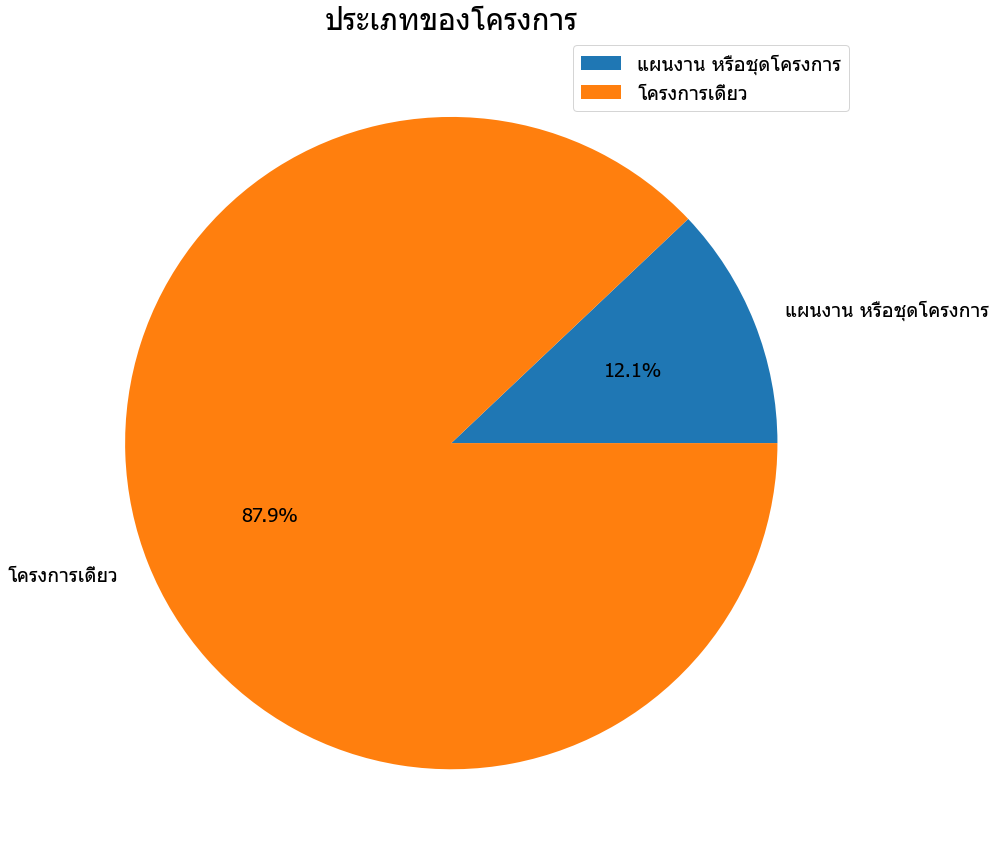

In [2]:
protype = data.groupby('ProjectType')['ProjectType'].count().to_frame('counttype')
protype.reset_index()
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=20
plot1 = protype.plot.pie(y= 'counttype',figsize = (20,15),autopct = '%.1f%%' , ylabel='')
plt.legend(loc="upper right")
plt.title('ประเภทของโครงการ',fontsize = 30)


Text(0.5, 1.0, 'สัดส่วนความสำเร็จของโครงการในปี 2564')

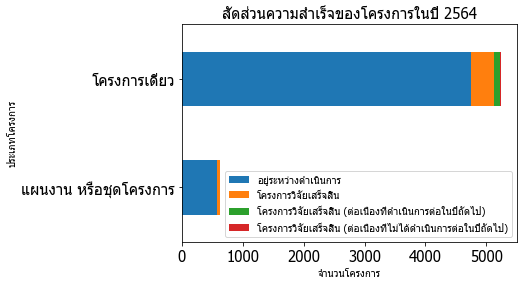

In [12]:
succase=  data.loc[ : ,['ProjectType','Projectstatus']]
ans2 = succase.groupby(['ProjectType','Projectstatus']).size().to_frame('AmountStatus')
ans2 = ans2.reset_index()
mm = ans2.groupby(['ProjectType','Projectstatus']).sum().groupby(level=[1]).cumsum().unstack().plot.barh(y='AmountStatus', stacked=True, fontsize = 15 )
plt.rcParams['font.size']=10
plt.xlabel('จำนวนโครงการ', fontsize=10)
plt.ylabel('ประเภทโครงการ', fontsize=10)
plt.legend(loc="lower right")
plt.title('สัดส่วนความสำเร็จของโครงการในปี 2564' ,fontsize = 15)

In [13]:
ans2['suc_percent'] = ans2['AmountStatus'] / ans2.groupby('ProjectType')['AmountStatus'].transform('sum')
ans2

,ProjectType,Projectstatus,AmountStatus,suc_percent
0,แผนงาน หรือชุดโครงการ,อยู่ระหว่างดำเนินการ,577,0.912975
1,แผนงาน หรือชุดโครงการ,โครงการวิจัยเสร็จสิ้น,55,0.087025
2,โครงการเดี่ยว,อยู่ระหว่างดำเนินการ,4180,0.907118
3,โครงการเดี่ยว,โครงการวิจัยเสร็จสิ้น,314,0.068142
4,โครงการเดี่ยว,โครงการวิจัยเสร็จสิ้น (ต่อเนื่องที่ดำเนินการต่...,103,0.022352
5,โครงการเดี่ยว,โครงการวิจัยเสร็จสิ้น (ต่อเนื่องที่ไม่ได้ดำเนิ...,11,0.002387


Text(0.5, 1.0, '10 อันดับสูงสุดของสาขาวิชาในการจัดทำโครงการในปี 2564')

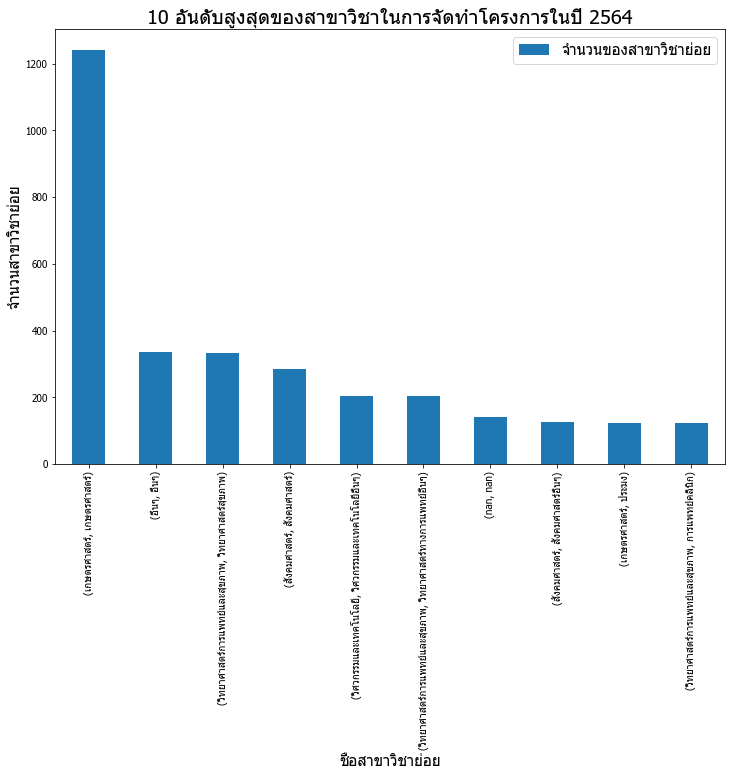

In [4]:
Subject = data.loc[ : ,['OECD1','OECD2']]
sub = Subject.groupby(['OECD1','OECD2'],dropna=False).size().to_frame('AmoEachSub')
fortop10=sub.sort_values('AmoEachSub',ascending=False)
top10 = fortop10.nlargest(n=10, columns = ["AmoEachSub"])
top10.plot.bar(figsize=(12, 8))
plt.xlabel('ชื่อสาขาวิชาย่อย', fontsize=15)
plt.ylabel('จำนวนสาขาวิชาย่อย', fontsize=15)
plt.legend(['จำนวนของสาขาวิชาย่อย'],loc='upper right', fontsize=15)
plt.title('10 อันดับสูงสุดของสาขาวิชาในการจัดทำโครงการในปี 2564' ,fontsize = 20)

In [9]:
sub = Subject.groupby(['OECD1','OECD2'],dropna=False).size().to_frame('AmoEachSub')
sub

AmoEachSub
OECD1                        OECD2                                        
มนุษยศาสตร์                  ประวัติศาสตร์และโบราณคดี                   13
                             ปรัชญา จริยธรรมและศาสนา                     6
                             ภาษาและวรรณคดี                             18
                             มนุษยศาสตร์อื่นๆ                           56
                             ศิลปะ                                      35
วิทยาศาสตร์การแพทย์และสุขภาพ การแพทย์คลินิก                            122
                             การแพทย์พื้นฐาน                            53
                             วิทยาศาสตร์ทางการแพทย์อื่นๆ               203
                             วิทยาศาสตร์สุขภาพ                         334
                             เทคโนโลยีชีวภาพทางด้านการแพทย์            108
วิทยาศาสตร์ธรรมชาติ          คณิตศาสตร์                                 69
                             วิทยาศาสตร์กายภาพ                         110
                             วิทยาศาสตร์คอมพิวเตอร์และสารสนเทศ          36
                             วิทยาศาสตร์ชีวภาพ                         120
                             วิทยาศาสตร์ธรรมชาติอื่นๆ                   85
                             วิทยาศาสตร์สิ่งแวดล้อม                    101
                             วิทยาศาสตร์เคมี                           111
วิศวกรรมและเทคโนโลยี         นาโนเทคโนโลยี                              23
                             วิศวกรรมการแพทย์                           51
                             วิศวกรรมสารสนเทศ                           70
                             วิศวกรรมสิ่งแวดล้อม                        33
                             วิศวกรรมเคมี                               52
                             วิศวกรรมเครื่องกล                          42
                             วิศวกรรมและเทคโนโลยีอื่นๆ                 205
                             วิศวกรรมโยธา                               22
                             วิศวกรรมโลหะและวัสดุ                       46
                             วิศวกรรมไฟฟ้าอิเล็กทรอนิกส์                69
                             เทคโนโลยีชีวภาพสิ่งแวดล้อม                 39
                             เทคโนโลยีชีวภาพอุตสาหการ                   33
                             เทคโนโลยีพลังงาน                           35
สังคมศาสตร์                  จิตวิทยา                                   20
                             นิติศาสตร์                                 29
                             นิเทศศาสตร์และสื่อสารมวลชน                 13
                             ภูมิศาสตร์ทางสังคมและเศรษฐกิจ              24
                             รัฐศาสตร์                                  23
                             ศึกษาศาสตร์                               104
                             สังคมศาสตร์                               285
                             สังคมศาสตร์อื่นๆ                          126
                             เศรษฐศาสตร์                                73
อื่นๆ                        อื่นๆ                                     335
เกษตรศาสตร์                  ประมง                                     123
                             ป่าไม้                                     85
                             วิทยาศาสตร์การเกษตร                        75
                             วิทยาศาสตร์ทางด้านการเกษตรอื่นๆ            70
                             สัตวศาสตร์                                 29
                             สัตวแพทยศาสตร์                             22
                             เกษตรศาสตร์                              1241
                             เทคโนโลยีชีวภาพทางด้านการเกษตร             93
                             NaN                                        28
NaN                          NaN                                       142